<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Visualizing-the-song-attributes-between-liked-and-disliked-songs" data-toc-modified-id="Visualizing-the-song-attributes-between-liked-and-disliked-songs-1">Visualizing the song attributes between liked and disliked songs</a></span><ul class="toc-item"><li><span><a href="#Liked-Vs-Disliked-songs-Audio-features" data-toc-modified-id="Liked-Vs-Disliked-songs-Audio-features-1.1">Liked Vs Disliked songs Audio features</a></span></li><li><span><a href="#loudness-and-tempo" data-toc-modified-id="loudness-and-tempo-1.2">loudness and tempo</a></span></li><li><span><a href="#Difference-between-liked-and-disliked-song-features" data-toc-modified-id="Difference-between-liked-and-disliked-song-features-1.3">Difference between liked and disliked song features</a></span></li><li><span><a href="#Std-dev-of-songs-grouped-by-audio-features" data-toc-modified-id="Std-dev-of-songs-grouped-by-audio-features-1.4">Std dev of songs grouped by audio features</a></span></li><li><span><a href="#Valence-and-Energy" data-toc-modified-id="Valence-and-Energy-1.5">Valence and Energy</a></span></li><li><span><a href="#Valence-and-Danceability" data-toc-modified-id="Valence-and-Danceability-1.6">Valence and Danceability</a></span></li></ul></li></ul></div>

In [1]:
import spotipy
#import spotipy.util as util
#import os
import numpy as np
#from spotipy.oauth2 import SpotifyOAuth
#from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
#import spotify_creds as creds
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

In [2]:
df = pd.read_csv('dataset/data.csv')

In [3]:
df.head()

,artist,album,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,target
0,P$C,25 To Life (83804/edited version),Do Ya Thing (feat. Young Dro),5ZcmLAogrj4HF8Odrz9XA2,48,0.754,0.7630,1,-6.570,1,0.2950,0.3200,0.000000,0.1430,0.704,159.963,265693,3,0
1,Shankar-Ehsaan-Loy,2 States,Offo,3f26GAn3yOXfoclLyN8AdD,48,0.799,0.6090,3,-6.729,1,0.0448,0.0158,0.000000,0.0642,0.758,130.031,213942,4,0
2,The Flight,Assassin's Creed Odyssey (Original Game Soundt...,One-Eyed Monster,4KXso8tiAGMx9nM6Hnj47a,28,0.310,0.6950,0,-12.317,1,0.0432,0.5220,0.896000,0.1100,0.195,133.582,230052,4,1
3,The Flight,Assassin's Creed Odyssey (Original Game Soundt...,The Sacred Land of Artemis,5BPUfta2IcMFNHFdOFHZJi,32,0.840,0.0996,7,-17.873,1,0.1010,0.7720,0.749000,0.0945,0.173,108.048,90654,3,1
4,Harris Jayaraj,Orange,Chilipiga,2mUvMLSJmlo5iI8PMLRRJz,46,0.657,0.4580,0,-10.035,1,0.0272,0.4090,0.000002,0.1570,0.339,93.484,328617,4,1


    Of the songs I like, what does the radar plot for average energy,
    speechiness, instrumentalness, etc look like.

## Visualizing the song attributes between liked and disliked songs

In [4]:
audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence', 'speechiness', 'target']

### Liked Vs Disliked songs Audio features
    - I seem to like the songs which have a lot more vocals(instrumentals).
    - Songs I like seem to be less energetic.

In [5]:
liked_df = df[df['target'] == 1][audio_features].drop('target', axis = 1)
disliked_df = df[df['target'] == 0][audio_features].drop('target', axis = 1)

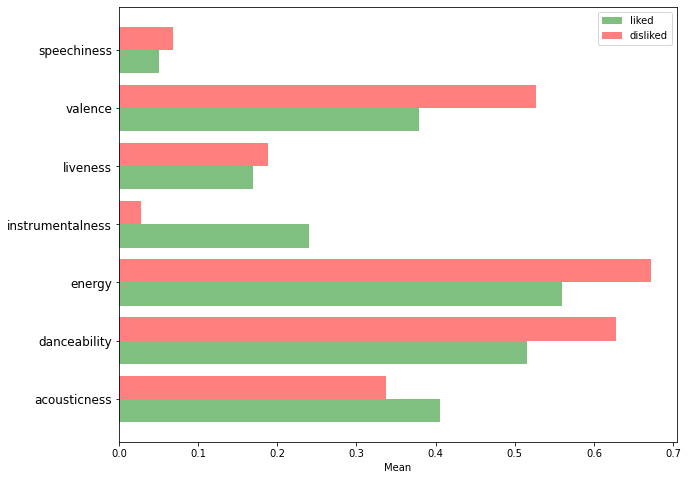

In [6]:
index = np.arange(len(liked_df.mean()))
width = 0.4
plt.figure(figsize = (10, 8))
plt.barh(index, liked_df.mean(), width, label = 'liked', color = 'g', alpha = 0.5)
plt.barh(index+width, disliked_df.mean(), width, label = 'disliked', color = 'r', alpha = 0.5)
plt.xlabel('Mean')
plt.yticks(index + width / 2, (list(liked_df)[:]), fontsize = 12)
plt.legend(loc = 'best')
style.use("ggplot")
plt.savefig('liked_vs_disliked.png')
plt.show()

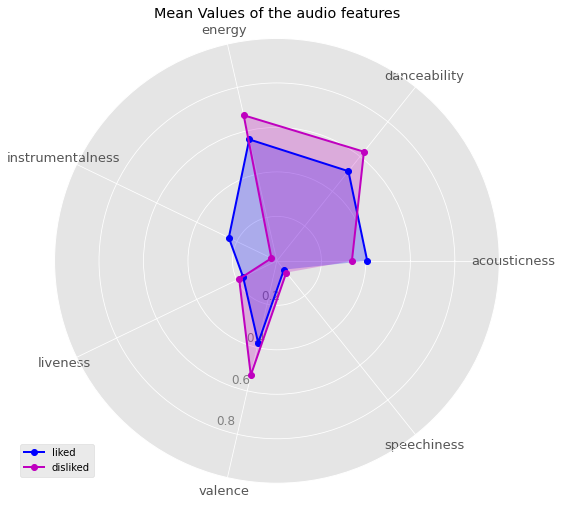

In [7]:
labels= list(liked_df)[:]
stats= liked_df.mean().tolist()
stats2 = disliked_df.mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
#Size of the figure
fig=plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "liked", color= 'b')
ax.fill(angles, stats, alpha=0.25, facecolor='b')
ax.set_thetagrids(angles * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

ax.plot(angles, stats2, 'o-', linewidth=2, label = "disliked", color = 'm')
ax.fill(angles, stats2, alpha=0.25, facecolor='m' )
ax.set_title('Mean Values of the audio features')
ax.grid(True)

plt.savefig('radial_plot.png')
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))




### loudness and tempo
    I seem to like loud songs

In [8]:
tempo_liked = df[df['target'] == 1][['tempo']]
tempo_disliked = df[df['target'] == 0][['tempo']]

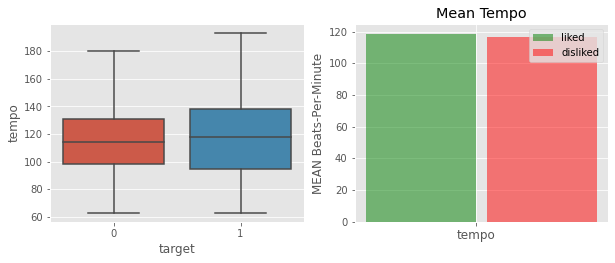

In [9]:
plt.figure(figsize = (10, 8))
plt.subplot(221)
sns.boxplot(y = 'tempo', x = 'target', data = df)

index = np.arange(len(tempo_liked.mean()))
width = 0.35

plt.subplot(222)
width = 0.35
plt.bar(index, tempo_liked.mean(), width, label = 'liked', color = 'g', alpha = 0.5)
plt.bar(index+1.1*width, tempo_disliked.mean(), width, label = 'disliked', color = 'r', alpha = 0.5)

plt.legend(loc = 'best')
plt.xticks(index + width/2, list(tempo_liked[:]), fontsize = 12)
plt.ylabel('MEAN Beats-Per-Minute')
plt.title("Mean Tempo")
plt.savefig('tempo.png')
style.use("ggplot")



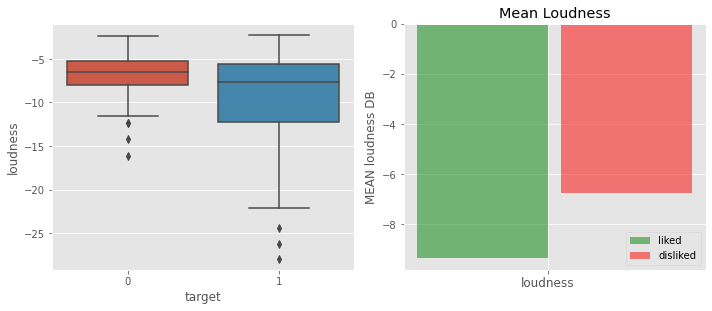

In [10]:
plt.figure(figsize = (10, 8))
plt.subplot(221)
sns.boxplot(y = 'loudness', x = 'target', data = df)

plt.subplot(222)
loudness_liked = df[df['target'] == 1][['loudness']]
loudness_disliked = df[df['target'] == 0][['loudness']]
index = np.arange(len(loudness_disliked.mean()))
width = 0.35
plt.bar(index, loudness_liked.mean(), width, color = 'g', label= 'liked', alpha = 0.5)
plt.bar(index+1.1*width, loudness_disliked.mean(), width, color = 'r', label= 'disliked', alpha = 0.5)

plt.legend(loc = 'best')
plt.xticks(index+width/2, list(loudness_liked[:]), fontsize = 12)
plt.title('Mean Loudness')
plt.ylabel('MEAN loudness DB')
plt.tight_layout()
plt.savefig('loudness.png')
plt.show()

### Difference between liked and disliked song features
    - The songs I dislike have a lot more Valence than liked songs(Meaning my liked songs are 
      predominantly sad, angry, depressed, morose).
    - The songs I dislike are a lot more speechy than liked.
    - Songs I like are more acounstic.
    - Songs I like are also more danceable.

All in all:
Songs I like are predomenantly, more acoustic, and danceable, but less speechy and generally more sorrowful 
    

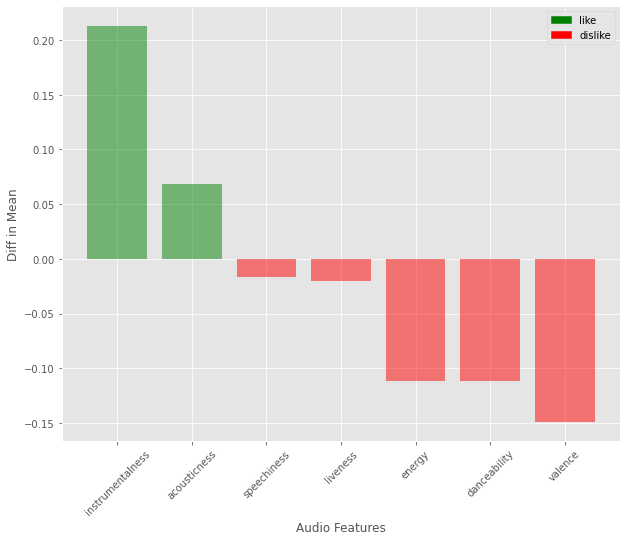

In [11]:
diff_features = liked_df.mean() - disliked_df.mean()
index = diff_features.sort_values(ascending = False).index

#
#fig, ax = plt.subplots()
plt.figure(figsize = (10, 8))
x = np.arange(diff_features.count())
y = diff_features.sort_values(ascending = False)
colors = ['g' if c>0 else 'r' for c in y]
plt.bar(x, y, color = colors, alpha = 0.5)
plt.xticks(x, y.index, rotation = 45)
#ax.set_xticklabels(index, rotation=45)

#Creating legend
import matplotlib.patches as mpatches
like_patch = mpatches.Patch(color ='g', label = 'like')
dislike_patch = mpatches.Patch(color = 'r', label = 'dislike')
plt.legend(handles = [like_patch,dislike_patch], loc = 'upper right')
plt.ylabel('Diff in Mean')
plt.xlabel('Audio Features')
plt.savefig('feat_diff.png')
plt.show()

    The songs I like seem to have a higher variety

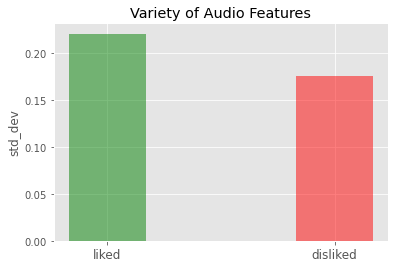

In [12]:
width = 0.34
plt.bar(0, liked_df.std().mean(),width = width,  color = 'g', alpha = 0.5)
plt.bar(1, disliked_df.std().mean(),width = width,  color = 'r', alpha = 0.5)
plt.xticks([0, 1], ['liked', 'disliked'], fontsize = 12)
plt.ylabel('std_dev')
plt.title('Variety of Audio Features')
plt.savefig('overall_variery.png')
plt.show()

### Std dev of songs grouped by audio features

In [13]:
liked_df.var()

acousticness        0.103410
danceability        0.031758
energy              0.061191
instrumentalness    0.141798
liveness            0.017573
valence             0.063405
speechiness         0.001375
dtype: float64

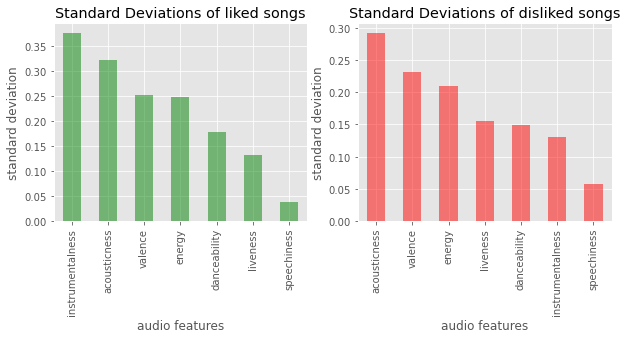

In [14]:
plt.subplot(221)
liked_df.std().sort_values(ascending = False).plot(kind = 'bar', color = 'g', alpha = 0.5, figsize = (10, 8))
ax.set_xticklabels(index, rotation=45)
plt.xlabel('audio features')
plt.ylabel('standard deviation')
plt.title('Standard Deviations of liked songs')
plt.subplot(222)
disliked_df.std().sort_values(ascending = False).plot(kind = 'bar', color = 'r', alpha = 0.5, figsize = (10, 8))
plt.xlabel('audio features')
plt.ylabel('standard deviation')
plt.title('Standard Deviations of disliked songs')
plt.savefig('song_stddev.png')
plt.show()

### Valence and Energy
- This scatter plot shows that I (mostly) like songs which are low in valence(sad) spanning between both high and low "Energy".\
- There doesnt seem to be any song that I listen to which are low "energy" high "Valence" (Calm Happy songs), 
- It seems from this chart that I like almost all low valence.


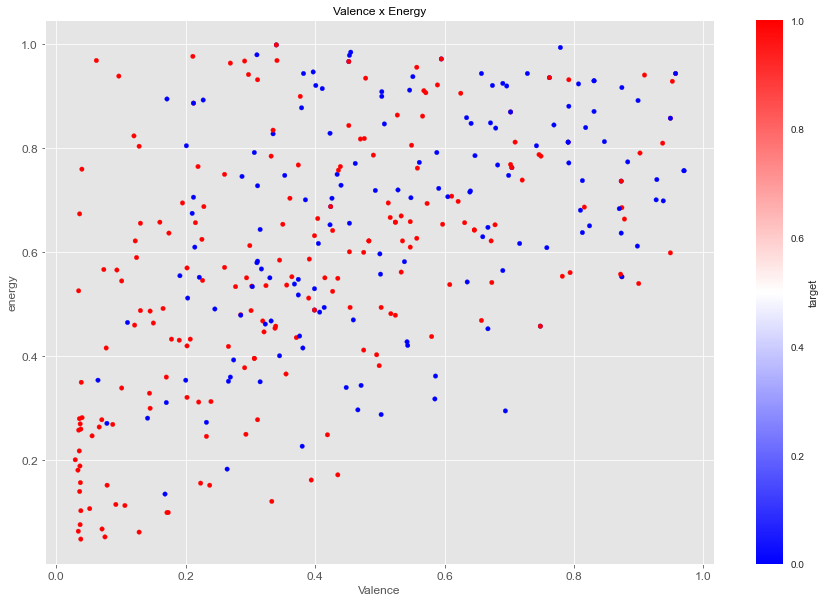

In [15]:
fig, ax = plt.subplots()
style.use('seaborn')
df.plot(kind='scatter',x='valence', y='energy',
        ax = ax ,c='target', colormap = 'bwr' ,
        title="Valence x Energy", figsize = (15, 10), fontsize = 12)
ax.set_xlabel("Valence")
plt.savefig('valencexenergy.png')
plt.show()

### Valence and Danceability
- In this chart there in the low valence, low danceability region there are almost exclusively songs I liked.

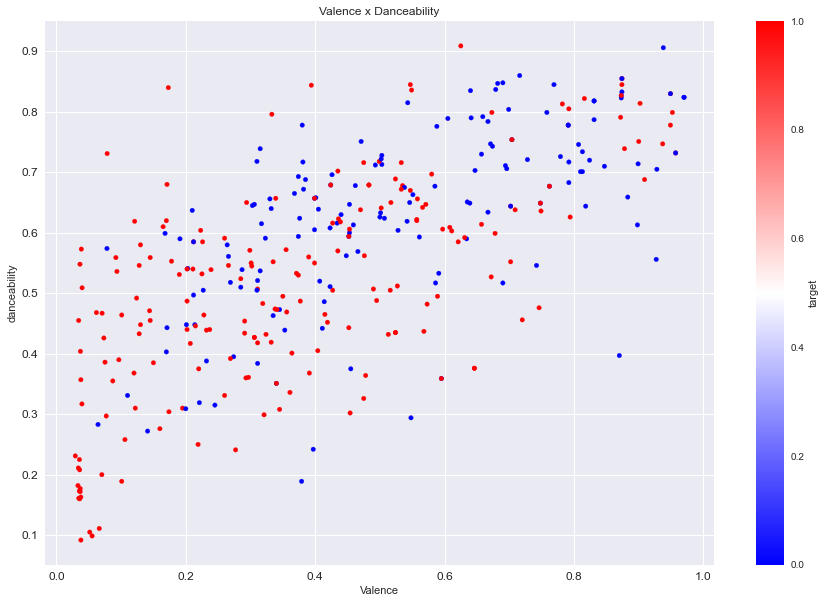

In [16]:
fig, ax = plt.subplots()
style.use('seaborn')
df.plot(kind='scatter',x='valence', y='danceability',
        ax = ax ,c='target', colormap = 'bwr' ,
        title="Valence x Danceability", figsize = (15, 10), fontsize = 12)
ax.set_xlabel("Valence")
plt.savefig('valxdance.png')
plt.show()